DESCRIPTION

Reduce the time a Mercedes-Benz spends on the test bench.

Problem Statement Scenario:
Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include the passenger safety cell with a crumple zone, the airbag, and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium carmakers. Mercedes-Benz is the leader in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.

To ensure the safety and reliability of every unique car configuration before they hit the road, the company’s engineers have developed a robust testing system. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Mercedes-Benz’s production lines. However, optimizing the speed of their testing system for many possible feature combinations is complex and time-consuming without a powerful algorithmic approach.

You are required to reduce the time that cars spend on the test bench. Others will work with a dataset representing different permutations of features in a Mercedes-Benz car to predict the time it takes to pass testing. Optimal algorithms will contribute to faster testing, resulting in lower carbon dioxide emissions without reducing Mercedes-Benz’s standards.

Following actions should be performed:<br>

If for any column(s), the variance is equal to zero, then you need to remove those variable(s).<br>
Check for null and unique values for test and train sets.<br>
Apply label encoder.<br>
Perform dimensionality reduction.<br>
Predict your test_df values using XGBoost.

In [1]:
#Import numpy , pandas and Matplotlib libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read the data which is saved as train and test seperately in two csv files provided

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
train_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_df.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


As per the above review of the dataframe head - column Y for the target variable is not part of the test data.

In [5]:
print(train_df.shape)
print(test_df.shape)

(4209, 378)
(4209, 377)


In [8]:
col_not_in_test = []
for col in train_df.columns:
    if col not in test_df.columns:
        col_not_in_test.append(col)

In [9]:
col_not_in_test

['y']

Again verified that the only column missing in the Test data is the target variable y. Also note that total number of features/input vairables is 377. Under this study we seek to find principal components and then reduce the data dimensionality to ensure that we keep only this Principal components that account for maximum explained variance in the original data

### Task 1 : If for any column(s), the variance is equal to zero, then you need to remove those variable(s).<h2>

In [10]:
#Find the columns with only 1 unique value i.e. no variances

columns_no_variance = train_df.columns[train_df.nunique()==1]

In [11]:
columns_no_variance

Index(['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293',
       'X297', 'X330', 'X347'],
      dtype='object')

In [12]:
train_df[columns_no_variance]

,X11,X93,X107,X233,X235,X268,X289,X290,X293,X297,X330,X347
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4204,0,0,0,0,0,0,0,0,0,0,0,0
4205,0,0,0,0,0,0,0,0,0,0,0,0
4206,0,0,0,0,0,0,0,0,0,0,0,0
4207,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
train_df[columns_no_variance].describe()

,X11,X93,X107,X233,X235,X268,X289,X290,X293,X297,X330,X347
count,4209.0,4209.0,4209.0,4209.0,4209.0,4209.0,4209.0,4209.0,4209.0,4209.0,4209.0,4209.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# With the above list of columns we can drop them from the original dataset as they do not have variance

train_df.drop(columns_no_variance,axis=1,inplace=True)

In [15]:
#Same drop needs to be applied for the test data frame.

test_df.drop(columns_no_variance,axis=1,inplace=True)

In [16]:
print(train_df.shape)
print(test_df.shape)

(4209, 366)
(4209, 365)


### Task 2 : Check for null and unique values for test and train sets.


In [17]:
train_df.columns[train_df.columns.notnull()]

Index(['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=366)

In [18]:
test_df.columns[test_df.columns.notnull()]

Index(['ID', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'X10',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=365)

In [19]:
#Checking columns with null values in Train dataset

train_null = train_df.isnull().sum()
train_null

ID      0
y       0
X0      0
X1      0
X2      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 366, dtype: int64

In [20]:
print(train_null[train_null!=0])
print(len(train_null[train_null!=0]))

Series([], dtype: int64)
0


In [21]:
#Checking columns with null values in Test dataset

test_null = test_df.isnull().sum()
test_null

ID      0
X0      0
X1      0
X2      0
X3      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 365, dtype: int64

In [22]:
print(test_null[test_null!=0])
print(len(test_null[test_null!=0]))

Series([], dtype: int64)
0


Based on above checks we confirm - There are no columns with null values in the Train and test sets

In [23]:
# Review the unique values of the Train and test datasets

train_unique_values = train_df.nunique()
test_unique_values = test_df.nunique()

In [24]:
train_unique_values

ID      4209
y       2545
X0        47
X1        27
X2        44
        ... 
X380       2
X382       2
X383       2
X384       2
X385       2
Length: 366, dtype: int64

In [25]:
test_unique_values

ID      4209
X0        49
X1        27
X2        45
X3         7
        ... 
X380       2
X382       2
X383       2
X384       2
X385       2
Length: 365, dtype: int64

##### Plotting the unique values for test and train sets. 

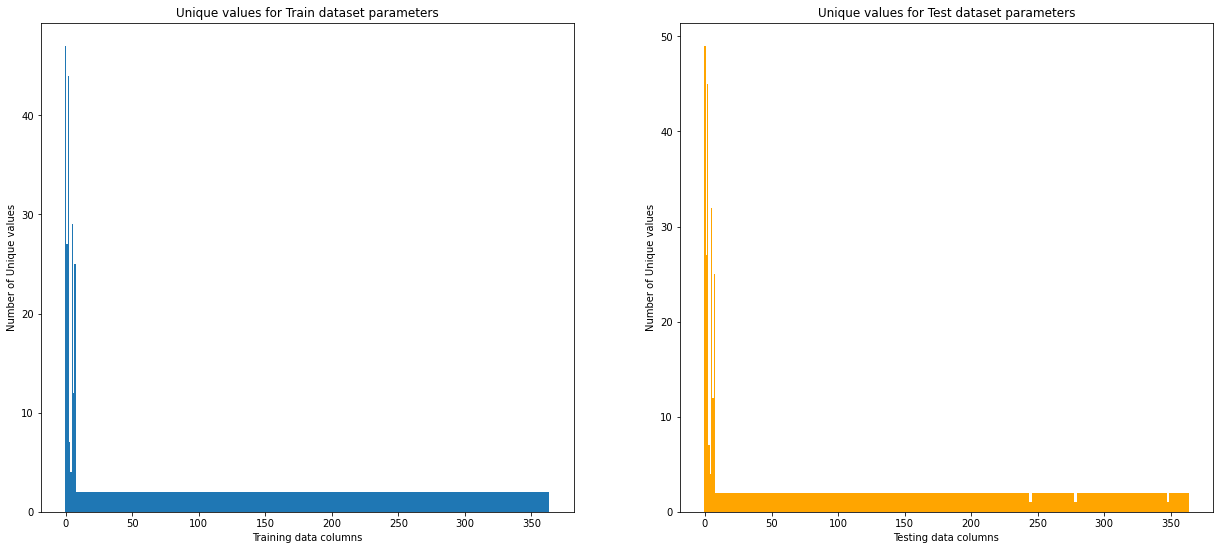

In [26]:
# Excluding column "ID" from both train and test
# Excluding column target "y" from train as this has huge number of unique values compared to other columns

x1 = range(len(train_df.columns.drop(["ID","y"])))
Y1 = train_unique_values[2:]
x2 = range(len(test_df.columns.drop("ID")))
Y2 = test_unique_values[1:]

plt.figure(figsize=(21,9))
fig1 = plt.subplot(1,2,1)
fig1.bar(x1,Y1,width=1)
plt.title("Unique values for Train dataset parameters")
plt.xlabel("Training data columns")
plt.ylabel("Number of Unique values")

fig2 = plt.subplot(1,2,2)
fig2.bar(x2,Y2,width=1,color='orange')
plt.title("Unique values for Test dataset parameters")
plt.xlabel("Testing data columns")
plt.ylabel("Number of Unique values")
plt.show()

### Task 3 : Apply label encoder.

In [27]:
# Import preprocessing from Sci-kit learn which has the LabelEncoder class and create new object

from sklearn import preprocessing
label_enc = preprocessing.LabelEncoder()

In [28]:
# Identify columns with categorical data to apply label encoding

train_category_cols= np.array(train_df.select_dtypes('O').columns)
train_category_cols

array(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype=object)

In [29]:
# Apply label encoder to the categorical columns identified

for col in train_category_cols:
    train_df[col]=label_enc.fit_transform(train_df[col])

In [30]:
train_df[train_category_cols]

,X0,X1,X2,X3,X4,X5,X6,X8
0,32,23,17,0,3,24,9,14
1,32,21,19,4,3,28,11,14
2,20,24,34,2,3,27,9,23
3,20,21,34,5,3,27,11,4
4,20,23,34,5,3,12,3,13
...,...,...,...,...,...,...,...,...
4204,8,20,16,2,3,0,3,16
4205,31,16,40,3,3,0,7,7
4206,8,23,38,0,3,0,6,4
4207,9,19,25,5,3,0,11,20


In [31]:
# Apply the same encoding to test columns. First find category columns in test data

test_category_cols= np.array(test_df.select_dtypes('O').columns)
test_category_cols

array(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype=object)

In [32]:
test_df[test_category_cols]

,X0,X1,X2,X3,X4,X5,X6,X8
0,az,v,n,f,d,t,a,w
1,t,b,ai,a,d,b,g,y
2,az,v,as,f,d,a,j,j
3,az,l,n,f,d,z,l,n
4,w,s,as,c,d,y,i,m
...,...,...,...,...,...,...,...,...
4204,aj,h,as,f,d,aa,j,e
4205,t,aa,ai,d,d,aa,j,y
4206,y,v,as,f,d,aa,d,w
4207,ak,v,as,a,d,aa,c,q


In [33]:
for col in test_category_cols:
    test_df[col]=label_enc.fit_transform(test_df[col])

In [34]:
test_df[test_category_cols]

,X0,X1,X2,X3,X4,X5,X6,X8
0,21,23,34,5,3,26,0,22
1,42,3,8,0,3,9,6,24
2,21,23,17,5,3,0,9,9
3,21,13,34,5,3,31,11,13
4,45,20,17,2,3,30,8,12
...,...,...,...,...,...,...,...,...
4204,6,9,17,5,3,1,9,4
4205,42,1,8,3,3,1,9,24
4206,47,23,17,5,3,1,3,22
4207,7,23,17,0,3,1,2,16


### Task 4 : Perform dimensionality reduction.

In [35]:
print(train_df.shape)
print(test_df.shape)

(4209, 366)
(4209, 365)


Remove the Target column from the train dataset before applying PCA for dimensionality reduction

In [36]:
# Storing the target in a new variable 

train_target = train_df['y']
train_target

0       130.81
1        88.53
2        76.26
3        80.62
4        78.02
         ...  
4204    107.39
4205    108.77
4206    109.22
4207     87.48
4208    110.85
Name: y, Length: 4209, dtype: float64

In [37]:
train_df_data = train_df.drop(["y"],axis=1)

In [38]:
train_df_data.columns

Index(['ID', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'X10',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=365)

In [39]:
test_df.columns

Index(['ID', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'X10',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=365)

In [40]:
print(train_df_data.shape)
print(test_df.shape)

(4209, 365)
(4209, 365)


In [41]:
# Import StandardScaler and PCA class and instantiate objects for transforming data

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# set n_components to 95% of explained variance under PCA for dimensionality reduction
sc = StandardScaler()
pca = PCA(n_components=0.95)

In [42]:
# First we apply standard scaler. We fit the scaler on Training data and same Transform applied to the test data

sc.fit(train_df_data)

# Apply same transformation to both Training and Test dataset
train_std = sc.transform(train_df_data)
test_std  = sc.transform(test_df)

In [43]:
# For PCA . We fit the PCA on the standardised Training data 
# Then same Transform PCA is applied to the test data

pca.fit(train_std)

# Apply same transformation to both Training and Test dataset
train_pca = pca.transform(train_std)
test_pca = pca.transform(test_std)

In [44]:
pca.explained_variance_ratio_

array([0.06873845, 0.05672831, 0.04525105, 0.03417386, 0.03255383,
       0.03154186, 0.02854713, 0.02118177, 0.01968633, 0.01778935,
       0.0163563 , 0.015601  , 0.0145906 , 0.01445648, 0.01344956,
       0.01292573, 0.01241382, 0.01171394, 0.01119126, 0.01074961,
       0.00989891, 0.0096776 , 0.00940046, 0.00908605, 0.00872347,
       0.0084076 , 0.00792762, 0.00761389, 0.00734903, 0.00718305,
       0.00691227, 0.00675052, 0.00655057, 0.00646544, 0.00621348,
       0.00600246, 0.0058665 , 0.00574454, 0.00562534, 0.00555771,
       0.00550145, 0.00538603, 0.00532449, 0.00523216, 0.00511352,
       0.00501857, 0.00497724, 0.00477276, 0.0046579 , 0.00459137,
       0.00446221, 0.0043733 , 0.00431693, 0.00429122, 0.00422545,
       0.0041891 , 0.00413148, 0.00405572, 0.0040222 , 0.00388352,
       0.00386855, 0.00380218, 0.00374184, 0.00365935, 0.00359751,
       0.00357123, 0.0035294 , 0.00346016, 0.00341059, 0.00335091,
       0.00332836, 0.0032594 , 0.00323873, 0.0032048 , 0.00316

<function matplotlib.pyplot.show(close=None, block=None)>

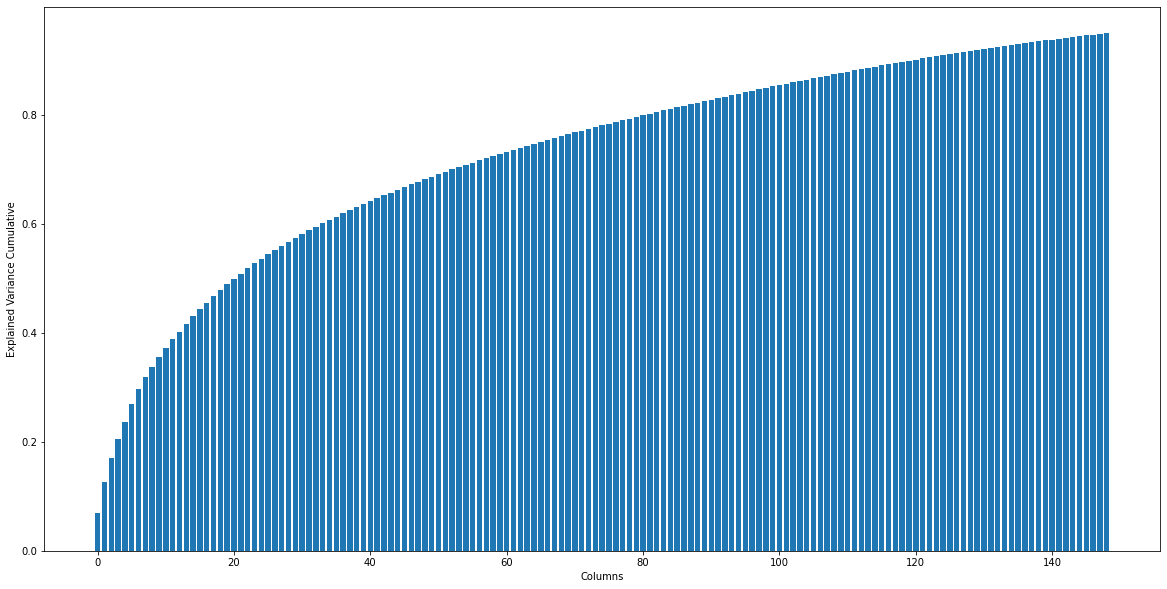

In [45]:
# Plotting the Principal components that contribute to explain 95% of the variance in the data

x = np.arange(len(pca.explained_variance_ratio_))
y = pca.explained_variance_ratio_.cumsum()
plt.figure(figsize=(20,10))
plt.bar(x,y)
plt.xlabel("Columns")
plt.ylabel("Explained Variance Cumulative")
plt.show

In [46]:
print(train_pca.shape)
print(test_pca.shape)

(4209, 149)
(4209, 149)


PCA reduced the number of components to 149 as we specified the n_components = 0.95. PCA has considered only those components that together explain 95% of the variance in the data

In [47]:
train_pca_df = pd.DataFrame(data=train_pca)
test_pca_df = pd.DataFrame(data=test_pca)

In [48]:
print(train_pca_df.shape)
print(test_pca_df.shape)

(4209, 149)
(4209, 149)


In [69]:
pca.components_.shape

(149, 365)

### Task 5 : Predict your test_df values using XGBoost

In [49]:
# Import XGBRegressor class from xgboost as target variable "Y" is a continous variable for Gradient boost.
# XGBRegressor uses objective funtion default=reg:squarederror by default which is approriate for regression 

from xgboost import XGBRegressor

In [50]:
# Creating instance of XGBRegressor

xgb = XGBRegressor(random_state = 47)

In [51]:
# Apply GridsearchCV for parameter tuning

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators':[100,150,200],
    'max_depth':[1,2,3,4,5,None],
    'learning_rate': [0.1,0.05,0.01,0.005]
}

In [52]:
gs = GridSearchCV(xgb,param_grid=param_grid,cv=3,verbose=2)

In [53]:
gs.fit(train_pca_df,train_target)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV] END ...learning_rate=0.1, max_depth=1, n_estimators=100; total time=   1.2s
[CV] END ...learning_rate=0.1, max_depth=1, n_estimators=100; total time=   1.3s
[CV] END ...learning_rate=0.1, max_depth=1, n_estimators=100; total time=   1.7s
[CV] END ...learning_rate=0.1, max_depth=1, n_estimators=150; total time=   1.8s
[CV] END ...learning_rate=0.1, max_depth=1, n_estimators=150; total time=   1.5s
[CV] END ...learning_rate=0.1, max_depth=1, n_estimators=150; total time=   1.4s
[CV] END ...learning_rate=0.1, max_depth=1, n_estimators=200; total time=   1.9s
[CV] END ...learning_rate=0.1, max_depth=1, n_estimators=200; total time=   1.9s
[CV] END ...learning_rate=0.1, max_depth=1, n_estimators=200; total time=   1.9s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=100; total time=   1.8s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=100; total time=   1.8s
[CV] END ...learning_rate=0.1, max_depth=2, n_e

[CV] END learning_rate=0.05, max_depth=None, n_estimators=100; total time=   5.0s
[CV] END learning_rate=0.05, max_depth=None, n_estimators=150; total time=   7.6s
[CV] END learning_rate=0.05, max_depth=None, n_estimators=150; total time=   7.7s
[CV] END learning_rate=0.05, max_depth=None, n_estimators=150; total time=  10.1s
[CV] END learning_rate=0.05, max_depth=None, n_estimators=200; total time=  10.6s
[CV] END learning_rate=0.05, max_depth=None, n_estimators=200; total time=  11.7s
[CV] END learning_rate=0.05, max_depth=None, n_estimators=200; total time=  10.7s
[CV] END ..learning_rate=0.01, max_depth=1, n_estimators=100; total time=   1.0s
[CV] END ..learning_rate=0.01, max_depth=1, n_estimators=100; total time=   1.0s
[CV] END ..learning_rate=0.01, max_depth=1, n_estimators=100; total time=   1.2s
[CV] END ..learning_rate=0.01, max_depth=1, n_estimators=150; total time=   1.5s
[CV] END ..learning_rate=0.01, max_depth=1, n_estimators=150; total time=   1.5s
[CV] END ..learning_r

[CV] END .learning_rate=0.005, max_depth=5, n_estimators=150; total time=   6.4s
[CV] END .learning_rate=0.005, max_depth=5, n_estimators=150; total time=   6.4s
[CV] END .learning_rate=0.005, max_depth=5, n_estimators=200; total time=   8.5s
[CV] END .learning_rate=0.005, max_depth=5, n_estimators=200; total time=   8.4s
[CV] END .learning_rate=0.005, max_depth=5, n_estimators=200; total time=   8.3s
[CV] END learning_rate=0.005, max_depth=None, n_estimators=100; total time=   4.5s
[CV] END learning_rate=0.005, max_depth=None, n_estimators=100; total time=   4.6s
[CV] END learning_rate=0.005, max_depth=None, n_estimators=100; total time=   4.1s
[CV] END learning_rate=0.005, max_depth=None, n_estimators=150; total time=   6.8s
[CV] END learning_rate=0.005, max_depth=None, n_estimators=150; total time=   6.5s
[CV] END learning_rate=0.005, max_depth=None, n_estimators=150; total time=   7.7s
[CV] END learning_rate=0.005, max_depth=None, n_estimators=200; total time=   9.3s
[CV] END learn

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=47,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parame

In [54]:
# Find the best parameters as per Grid search CV run

gs.best_params_

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 150}

In [55]:
gs.best_score_

0.46624469597916357

##### Best params are : learning_rate : 0.05, max_depth : 3, n_estimators : 15.  
This yeilded a score of 46.62%

In [56]:
# Performing K-fold cross validation using the best params from Grid search

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfoldcv = KFold(n_splits=10,shuffle=True)
model = XGBRegressor(n_estimators=150,booster = "gbtree",learning_rate = 0.05,max_depth = 3,random_state=47)
results = cross_val_score(model,train_pca_df,train_target,cv=kfoldcv)

In [57]:
results

array([0.57598522, 0.31803189, 0.50120766, 0.54004883, 0.49836927,
       0.53608859, 0.48625887, 0.50787618, 0.52921395, 0.56113943])

In [58]:
results.mean()

0.5054219891509579

In [59]:
#Final fitting and XGBoost prediction on the train data

model.fit(train_pca_df,train_target)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=150, n_jobs=4, num_parallel_tree=1, random_state=47,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [60]:
model.score(train_pca_df,train_target)

0.6235282887802929

The model has 62% accuracy score on the Train data

In [61]:
# Apply the model to predict the test data

model.predict(test_pca_df)

array([ 92.38335 , 108.01243 ,  95.06007 , ...,  97.448654, 109.365845,
        94.79843 ], dtype=float32)

Test data prediction generated.Accuracy cannot be evaluated as the actual target values are not known for test data. As per k-fold this model should be about 50% accurate on average on the unseen test data

In [62]:
# Evaluating and reviewing the Train data predictions

train_df['predicted_y']=model.predict(train_pca_df)

In [63]:
result_df = train_df.loc[:,["y","predicted_y"]]
result_df

,y,predicted_y
0,130.81,116.560814
1,88.53,95.592178
2,76.26,80.175461
3,80.62,81.237762
4,78.02,79.686218
...,...,...
4204,107.39,106.103943
4205,108.77,108.158813
4206,109.22,111.268692
4207,87.48,96.644402


<BarContainer object of 4209 artists>

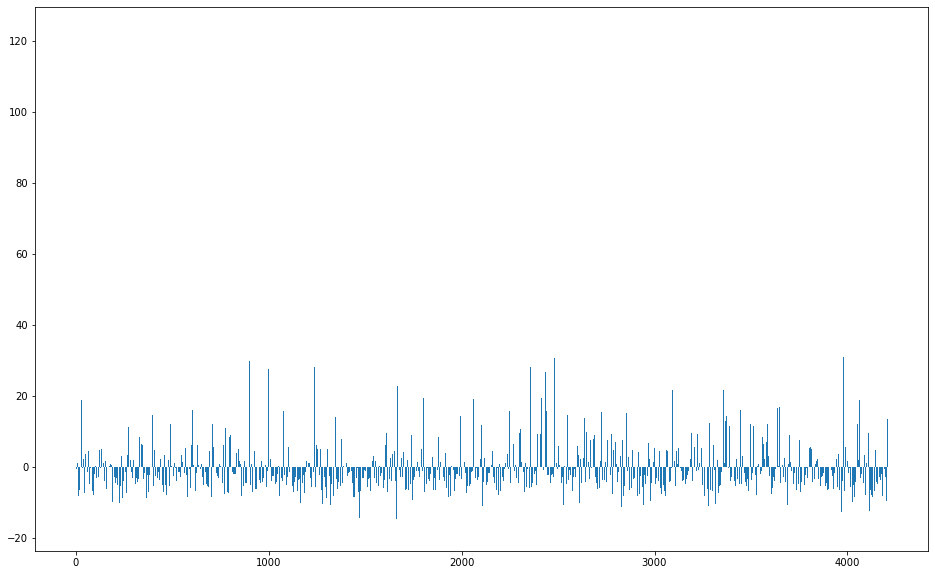

In [64]:
# Creating plot to show differences or error between y and predicted y for train dataset. 
# Since the target is only part of the train data 
plt.figure(figsize=(16,10))
plt.bar(np.arange(4209),result_df["y"]-result_df["predicted_y"])